## Assignment 3: $k$ Nearest Neighbor

`! git clone https://github.com/ds3001f25/knn_assignment.git`

**Do two questions in total: "Q1+Q2" or "Q1+Q3"**


**Q1.**
1. What is the difference between regression and classification?
2. What is a confusion table? What does it help us understand about a model's performance?
3. What does the SSE quantify about a particular model?
4. What are overfitting and underfitting?
5. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?
6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

**Answers to Q1**
1. Regression is predicting a numeric outcome, while classification is predicting a categorical outcome instead.

2. In classifications, the confusion table is a cross-tabulation of predicted vs actual values. It provides a detailed view of how well a model distinguishes between classes, highlighting overall correctness but also what types of errors the model tends to make.

3. SSE (sum of squared errors) quantifies how far off the model’s predictions are from the actual observed values by summing the squared differences between them.

4. Overfitting occurs when your model is too complex to reliably explain the phenomenon you are interested in, while underfitting occurs when your model is too simple to reliably explain the phenomenon you are interested in.

5. To prevent a model from memorizing/overfitting the training data, we split it into training and test sets (this improves generalization). By evaluating SSE on test set it determines the best model for fresh data not the data it was trained with.

6. Class labels give clarity because they are direct, but they have less information about uncertainty.
Probability distributions give nuance and flexibility about confidence of the model, but they require careful interpretation and calibration.


**Q2.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

,price,year,mileage
0,6300,2008,274117
1,2899,2011,190552
2,5350,2018,39590
3,25000,2014,64146
4,27700,2018,6654


,price,year,mileage
count,2499.000000,2499.000000,2.499000e+03
mean,18767.671469,2016.714286,5.229869e+04
std,12116.094936,3.442656,5.970552e+04
min,0.000000,1973.000000,0.000000e+00
25%,10200.000000,2016.000000,2.146650e+04
50%,16900.000000,2018.000000,3.536500e+04
75%,25555.500000,2019.000000,6.347250e+04
max,84900.000000,2020.000000,1.017936e+06


k = 3, MSE = 148065935.51955554


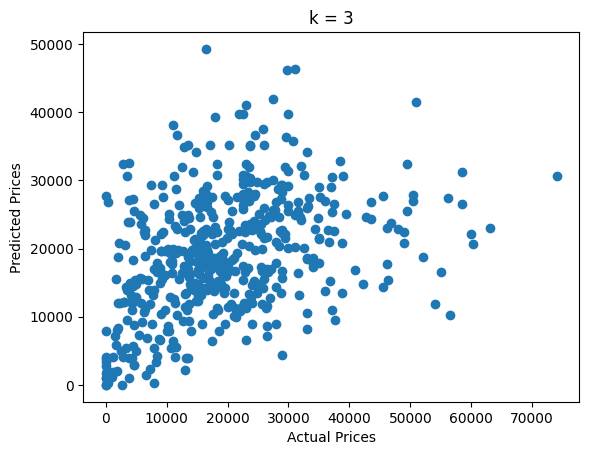

k = 10, MSE = 117399126.10604002


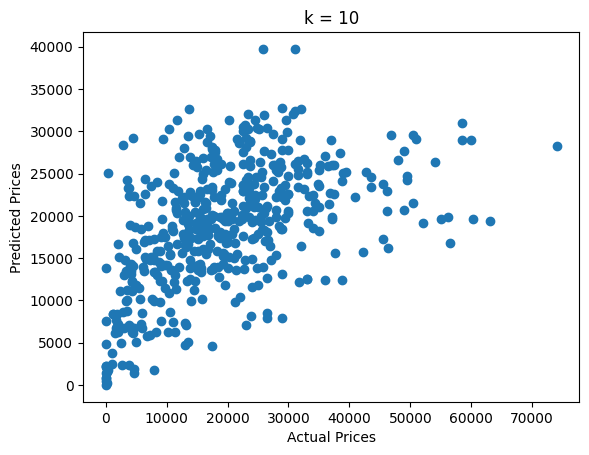

k = 25, MSE = 112576160.82390079


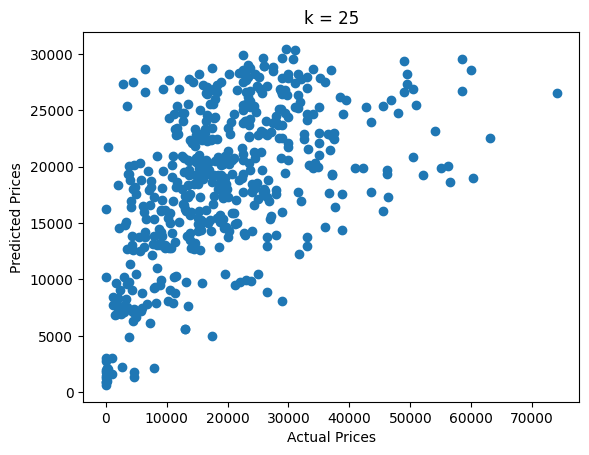

k = 50, MSE = 110202549.3014296


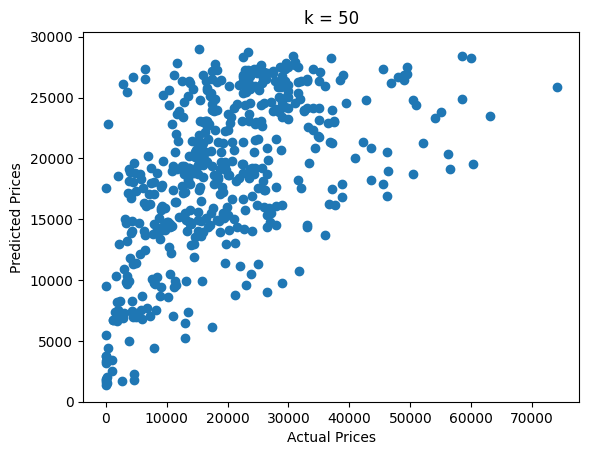

k = 100, MSE = 112253932.8184272


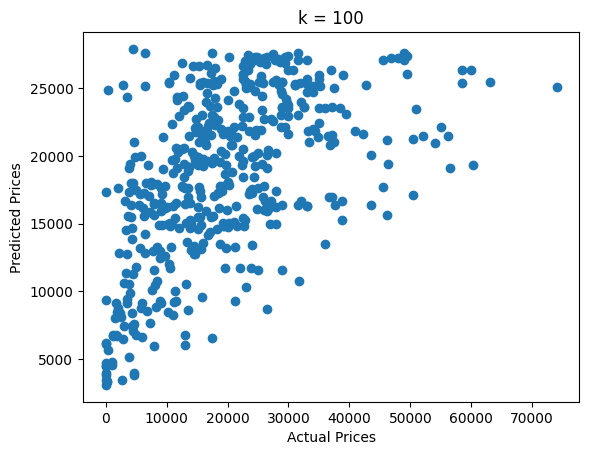

k = 300, MSE = 114496301.82933456


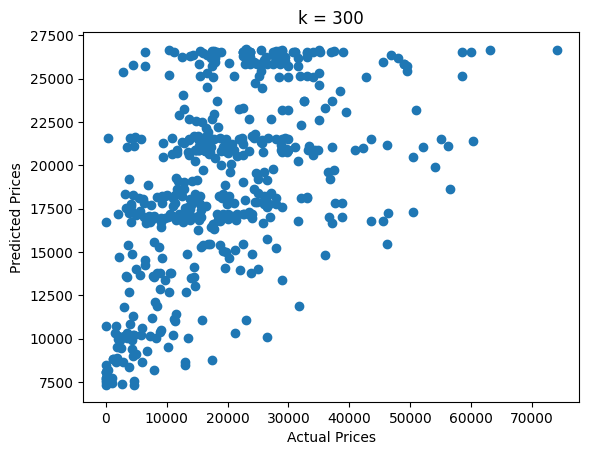


Optimal k: 49


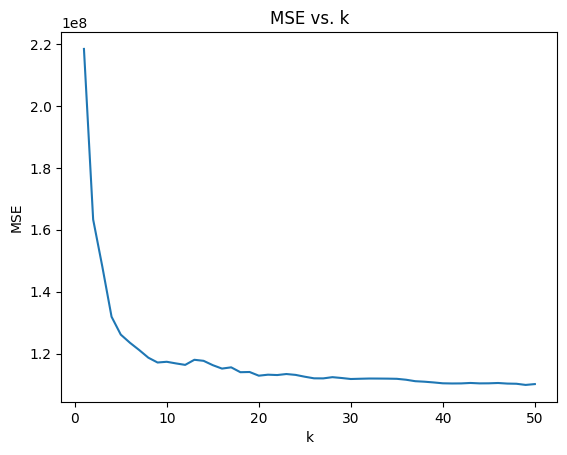

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Q2 part 1
cars = pd.read_csv('./USA_cars_datasets.csv')
cars = cars[['price', 'year', 'mileage']]
display(cars.head())
# display(cars.info()) #no NaN
display(cars.describe())


#Q2 part 2
def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return(z)

cars['year'] = maxmin(cars['year'])
cars['mileage'] = maxmin(cars['mileage'])

#Q2 part 3
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor # Import the kNN regression tool
from sklearn.metrics import mean_squared_error # Import the mean squared error function

X = cars[['year', 'mileage']]
y = cars['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Q2 part 4
k_values = [3, 10, 25, 50, 100, 300]
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"k = {k}, MSE = {mse}")
    plt.scatter(y_test, y_pred)
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.title(f'k = {k}')
    plt.show()
#what patterns do I notice as K increases

#Q2 part 5
# Determine the optimal k = 49
k_values_for_optimization = range(1, 51) # checking k from 1 to 50
mse_values = []
for k in k_values_for_optimization:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

optimal_k = k_values_for_optimization[np.argmin(mse_values)]
print(f"\nOptimal k: {optimal_k}")

plt.plot(k_values_for_optimization, mse_values)
plt.xlabel('k')
plt.ylabel('MSE')
plt.title('MSE vs. k')
plt.show()

#Q2 part 6



**Q3.** This is a case study on $k$ nearest neighbor regression and imputation, using the `airbnb_hw.csv` data.

There are 30,478 observations, but only 22,155 ratings. We're going to build a kNN regressor to impute missing values. This is a common task, and illustrates one way you can use kNN in the future even when you have more advanced models available.

1. Load the `airbnb_hw.csv` data with Pandas. We're only going to use `Review Scores Rating`, `Price`, and `Beds`, so use `.loc` to reduce the dataframe to those variables.
2. Set use `.isnull()` to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.
3. Use `df = df.dropna(axis = 0, how = 'any')` to eliminate any observations with missing values/NA's from the dataframe.
4. For the complete cases, create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`. How do you choose $k$? (Hint: Train/test split, iterate over reasonable values of $k$ and find a value that minimizes SSE on the test split using predictions from the training set.)
5. Predict the missing ratings.
6. Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Explain why.